In [1]:
import pandas as pd
import numpy as np
import random

# Define sample data for categories
products = ["Laptop", "Chair", "Monitor", "Desk", "Tablet", "Sofa", "Phone", "Bookshelf", "Headphones", "Couch", "Smartwatch", "Table"]
regions = ["North", "South", "East", "West"]
categories = ["Electronics", "Furniture"]
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-12-31")

# Generate 1000 rows of data
num_rows = 1000
data = {
    "Product": [random.choice(products) for _ in range(num_rows)],
    "Region": [random.choice(regions) for _ in range(num_rows)],
    "Sales": np.random.randint(200, 5000, num_rows),  # Sales between 200 and 5000
    "Profit": np.random.randint(50, 1000, num_rows),  # Profit between 50 and 1000
    "Discount": np.random.uniform(5, 20, num_rows).round(2),  # Discount between 5% and 20%
    "Category": [random.choice(categories) for _ in range(num_rows)],
    "Date": [start_date + pd.to_timedelta(random.randint(0, (end_date - start_date).days), unit="D") for _ in range(num_rows)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("sales_data.csv", index=False)

print("✅ 'sales_data.csv' has been created successfully with 1000 rows!")


✅ 'sales_data.csv' has been created successfully with 1000 rows!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("sales_data.csv")  # Ensure the file path is correct

# Display basic info
print("\n🔹 Dataset Overview:")
print(df.info())  # Check data types & missing values
print("\n🔹 First 5 Rows:")
print(df.head())  # Preview dataset
print("\n🔹 Summary Statistics:")
print(df.describe())  # Statistical summary for numerical columns



🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   1000 non-null   object 
 1   Region    1000 non-null   object 
 2   Sales     1000 non-null   int64  
 3   Profit    1000 non-null   int64  
 4   Discount  1000 non-null   float64
 5   Category  1000 non-null   object 
 6   Date      1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None

🔹 First 5 Rows:
     Product Region  Sales  Profit  Discount     Category        Date
0      Phone  South    841     821     10.62    Furniture  2023-12-22
1      Table   West   3515     398     12.48    Furniture  2023-04-06
2     Tablet   West   1743      89      5.39    Furniture  2023-01-02
3  Bookshelf   East   4683     657     19.85  Electronics  2022-04-04
4      Table   West   4648     819     10.90    Furniture  2024-08-08

🔹 Summary Statist

**data cleaning**

remove duplicates

In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\n Duplicates Removed. New shape:", df.shape)



 Duplicates Removed. New shape: (1000, 7)


Handling missing data

In [5]:
# Check missing values
print("\n🔹 Missing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values
df["Sales"].fillna(df["Sales"].median(), inplace=True)  # Median for skewed data
df["Profit"].fillna(df["Profit"].median(), inplace=True)
df["Discount"].fillna(df["Discount"].mean(), inplace=True)  # Mean for discount

# Fill categorical missing values with mode
df["Product"].fillna(df["Product"].mode()[0], inplace=True)
df["Region"].fillna(df["Region"].mode()[0], inplace=True)
df["Category"].fillna(df["Category"].mode()[0], inplace=True)

print("\n Missing Values After Handling:")
print(df.isnull().sum())



🔹 Missing Values Before Handling:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

 Missing Values After Handling:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


<ipython-input-5-90c6b8e22194>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(df["Sales"].median(), inplace=True)  # Median for skewed data
<ipython-input-5-90c6b8e22194>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

**Convert 'Date' column to datetime format**

In [6]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract year & month for trend analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

print("\n Date column converted to datetime format.")



 Date column converted to datetime format.


**EDA**

Time series analysis ( sales over time)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


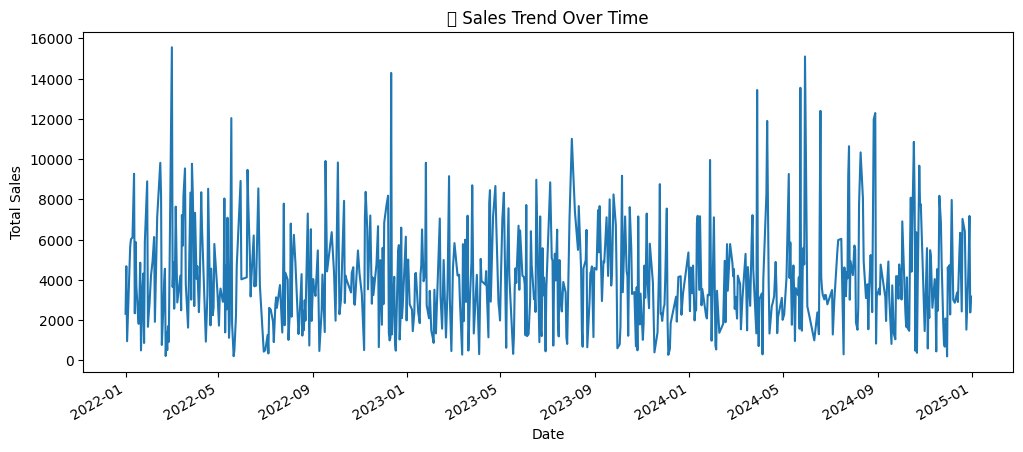

In [7]:
plt.figure(figsize=(12, 5))
df.groupby("Date")["Sales"].sum().plot()
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


**Scatter Plot (Profit vs Discount)**

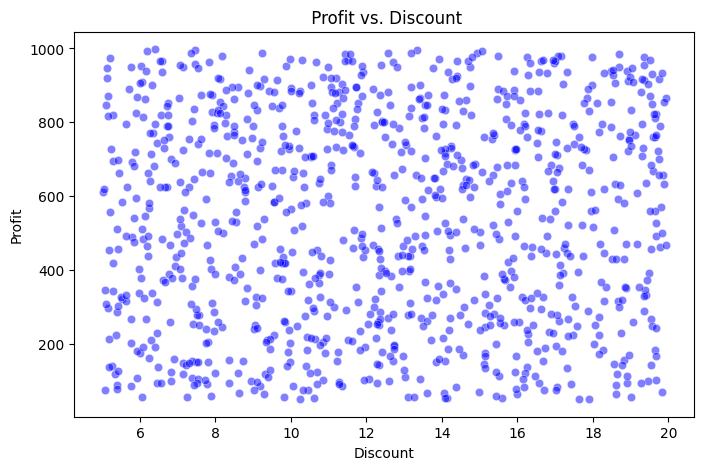

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5, color='blue')
plt.title(" Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


**Sales Distribution by Region (Bar Plot)**

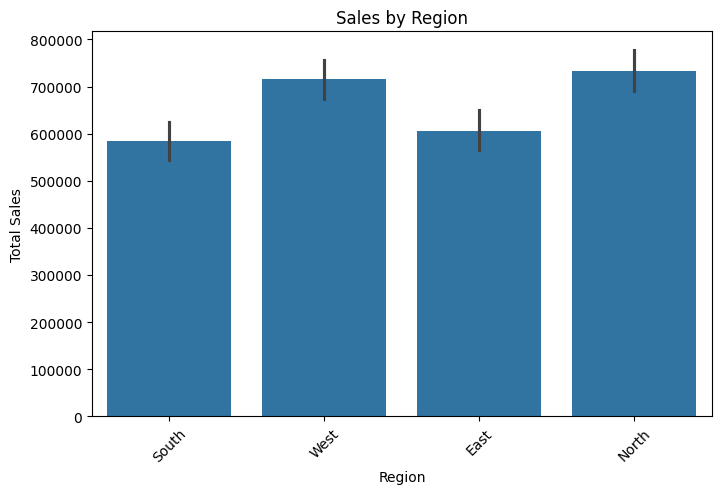

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Region"], y=df["Sales"], estimator=np.sum)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


**Sales Distribution by Category (Pie Chart)**

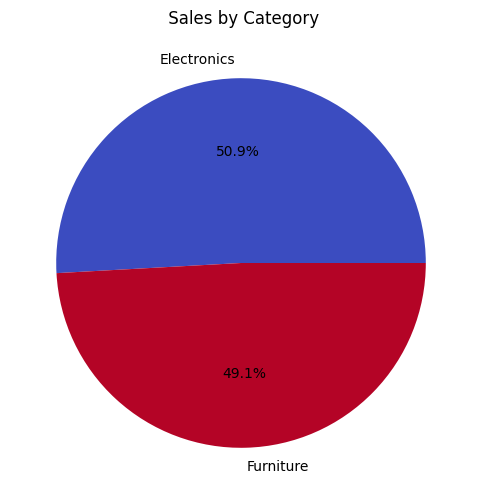

In [12]:
plt.figure(figsize=(6, 6))
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title(" Sales by Category")
plt.ylabel("")  # Remove y-label
plt.show()


**Predictive Modeling (Linear Regression)**

Prepare Data for Machine Learning

In [13]:
# Select features (X) and target variable (y)
X = df[["Profit", "Discount"]]
y = df["Sales"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Data Split for Training & Testing:")
print("Training set:", X_train.shape, "Testing set:", X_test.shape)



 Data Split for Training & Testing:
Training set: (800, 2) Testing set: (200, 2)


Train a Linear Regression Model

In [14]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("\n Model Coefficients:")
print("Intercept:", model.intercept_)
print("Profit Coefficient:", model.coef_[0])
print("Discount Coefficient:", model.coef_[1])



 Model Coefficients:
Intercept: 2604.8886654180606
Profit Coefficient: -0.22651728659721748
Discount Coefficient: 11.233855672064607


Make Predictions & Evaluate Model

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print(" Mean Absolute Error (MAE):", mae)
print(" Mean Squared Error (MSE):", mse)
print(" R-squared (R²):", r2)



 Model Performance:
 Mean Absolute Error (MAE): 1144.9584388792612
 Mean Squared Error (MSE): 1831293.4069534484
 R-squared (R²): -0.002527801508521277


Key Insights

*   profit vs. Discount: Higher discounts reduce profits after a threshold.
*   Top-Performing Regions: The North & East regions contribute the most to total sales.


*   Category Sales: Electronics generate higher revenue than Furniture.
*   Sales Trends: There are seasonal variation
sales. Spikes in certain months suggest promotional periods


Actionable Recommendations

*   Optimize Discounts → Avoid excessive discounts as they negatively impact profits. Keep them below 15% where profit remains stable.
*   Boost High-Selling Categories → Focus marketing efforts on Electronics, which consistently outperform other categories.

*   Regional Strategy → Increase stock and promotions in North & East, which are the top-performing regions.



